<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/logistic/Habermans_Survival_DAtaset_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Model

Haberman's Survival Datasets

In [1]:
#importing libraires
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#importing the dataset "haberman" from python folder in documents to colab
df = pd.read_csv("haberman.csv")
print(df.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


Analysing the dataset "haberman"

In [3]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [5]:
#There are no NaN values in the model
#There is no need for replacing and handelling missing values
df["status"]=df["status"].replace({1:0,2:1})

Representing The Data

In [6]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


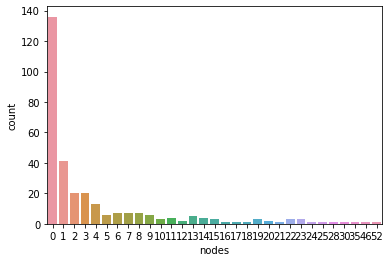

In [7]:
sb.countplot("nodes",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


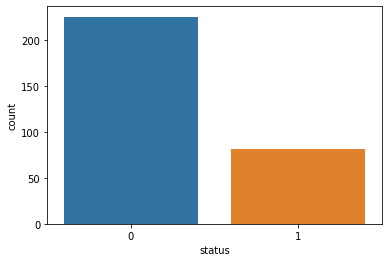

In [8]:
sb.countplot("status",data=df)

In [9]:
df["status"].value_counts()

0    225
1     81
Name: status, dtype: int64

In [10]:
df["nodes"].value_counts()

0     136
1      41
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: nodes, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


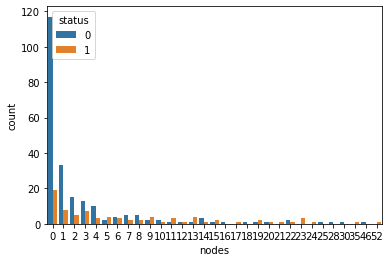

In [11]:
sb.countplot("nodes" , hue = 'status',data=df)

Model : Logistic Regression 

In [12]:
from sklearn.linear_model import LogisticRegression as l

In [13]:
X=df.drop(columns="status")
Y=df["status"]

In [14]:
print(X.shape)
print(Y.shape)

(306, 3)
(306,)


Training and Testing datasets

In [15]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,stratify=Y)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(214, 3)
(214,)
(92, 3)
(92,)


In [16]:
model = l()
model.fit(X_train,Y_train)


LogisticRegression()

In [17]:
y_predicted = model.predict(X_test)
y_proba_pred = model.predict_proba(X_test)

In [18]:
print(y_predicted.shape)
print(y_predicted)

(92,)
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0]


In [19]:
acc = accuracy_score(Y_test,y_predicted)
print("The accuracy score is %d",acc)

The accuracy score is %d 0.75


Confusion Matrix

In [20]:
matrix=confusion_matrix(Y_test,y_predicted)
print(matrix)

[[66  2]
 [21  3]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Confusion Matrix')

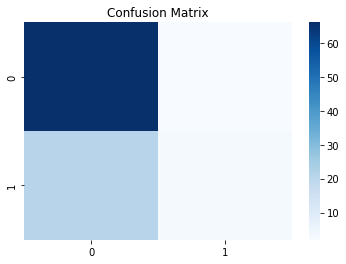

In [21]:
sb.heatmap(matrix , cmap = "Blues")
ax=plt.axes()
ax.set_title("Confusion Matrix")

ROC Curve


In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [23]:
roc_auc1 = roc_auc_score(Y_test,y_predicted)
print(roc_auc1)

0.5477941176470588


In [24]:
fpr, tpr ,_= roc_curve(Y_test,y_proba_pred[:,1])

Plotting the ROC Curve

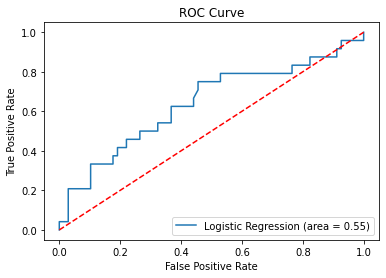

In [25]:
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")